## Communicate Data Finding Slide-Deck : Ford GoBike System Data
#### By : Abdelrhman Eltantawy
#### Investigation Overview
#### In this investigation, we'll be taking a look at the data for Ford's GoBike program, with the data kindly provided to us by Ford themselves. Transparently, there aren't a ton of quantitative fields in this dataset, so we'll do our best to make the most of it 

## Dataset Overview
The dataset(s) provided to us by Ford contain the following fields:

 - Trip Duration (in seconds)
 - Start Time and Date
 - End Time and Date
 - Start Station ID
 - Start Station Name
 - Start Station Latitude
 - Start Station Longitude
 - End Station ID
 - End Station Name
 - End Station Latitude
 - End Station Longitude
 - Bike ID
 - User Type (Subscriber or Customer - "Subscriber" = Member or "Customer" = Casual)
 - Member Year of Birth
 - Member Gender


#### and the most quastion we will look for is 
#### What are the features affecting trip duration the most ( weather , user type, age, weekdays) ?

In [1]:
#Importing all the things we'll be using to create our visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')


In [3]:
# I will just drop the null values 
# drop the null values
df.dropna(subset=['member_gender', 'member_birth_year','end_station_id','end_station_name'], inplace=True)
df.head().isnull().sum()

#changing data type of start_time and end_time to datetime.
# fixing the dtypes problems.
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['start_station_id'] = df['start_station_id'].astype(str)
df['end_station_id'] = df['end_station_id'].astype(str)
df['bike_id'] = df['bike_id'].astype(str)
df['member_birth_year'] = df['member_birth_year'].astype(int)



In [4]:
# I will add some columns to the dataset, that i extracted from some of it's columns like age of the users for example
df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_hourofday'] = df.start_time.dt.strftime('%H')
df['start_day'] = df.start_time.dt.strftime('%A')
df['start_month'] = df.start_time.dt.strftime('%B')
df['duration_min'] = df['duration_sec'] / 60 
df['age'] = 2019 - df['member_birth_year']
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [5]:
# this is our data after fixing it 
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_hourofday,start_day,start_month,duration_min,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,2019-02-28,17,Thursday,February,869.75,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,2019-02-28,12,Thursday,February,1030.90,47


# age and duration
before we go in analyzing this data I want to ask you 
in your prescitve what is the most factor that does affect trip duration ?
let's start by looking the relationship between age and duration

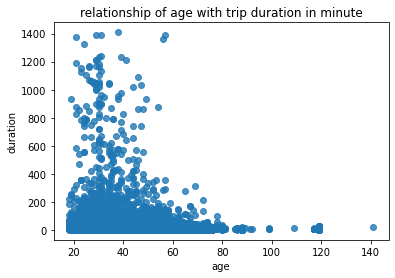

In [6]:
plt.scatter(data=df, x='age', y='duration_min', alpha=0.8)
plt.xlabel('age')
plt.ylabel('duration')
plt.title('relationship of age with trip duration in minute');



- the graph above tell's us that most of the users age are between 20 and 40 and their average duration is between 0 and 400 minutes

# user type 
what do you think is the difference between the customer and subscriber ?

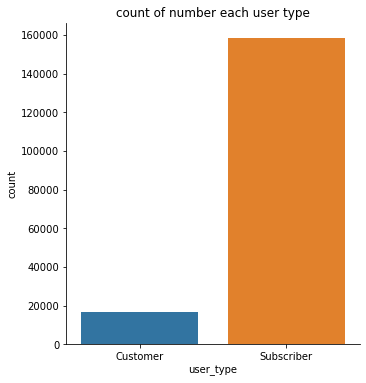

In [7]:
# let's explore user_type
sns.catplot(data=df, x='user_type', kind='count')
plt.title('count of number each user type');

- the subscriber are higher in number of users by far than the customers

# user type in terms of duration

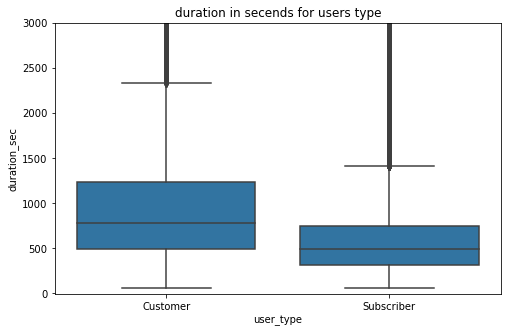

In [8]:
# but let's see who actually are higher but in terms of duration in seconds 
plt.figure(figsize = [8, 5])
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([-10, 3000])
plt.title('duration in secends for users type');


- the customers are ones higher in usage of the bikes although the subscriber are more numbers 

# start time
did you thought about about the start time of using the bikes, 
that maybe we find something in there well i thought that too 


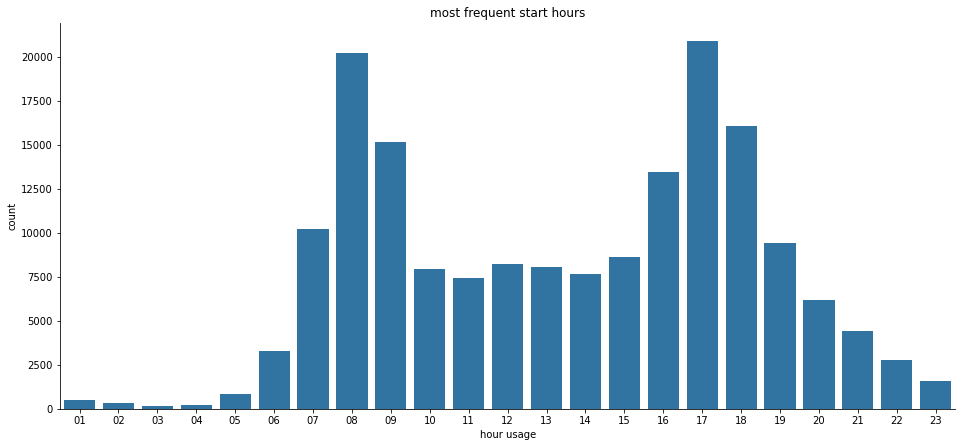

In [9]:
# let's see if theirs a relationship of some sort in the start hour in of day in using the bikes
hours_order = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23'];
hours_freq = sns.catplot(x='start_hourofday', kind='count', color=base_color, data=df, aspect=1.5, order=hours_order);
plt.xlabel('hour usage')
plt.title('most frequent start hours')
hours_freq.fig.set_size_inches(14,6);


- the most frequent usage is 8am in the morning, and 5pm in the night.

# user type & gender & renting the bike 
user type & member gender with who share or rent it there bike for each of them 

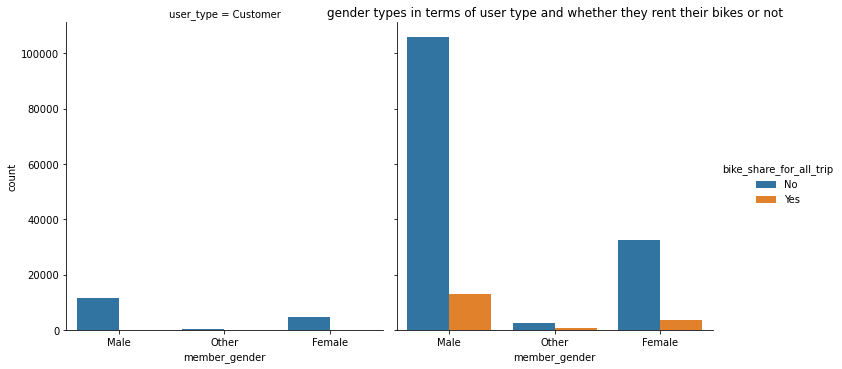

In [10]:
# let's look for the user_type and with each of their genders and who are the ones who does rent their bikes
sns.catplot(x='member_gender', hue='bike_share_for_all_trip', col='user_type', kind='count', data=df)
plt.title('gender types in terms of user type and whether they rent their bikes or not');

- the graph tells us that most of the subscreber does rent their bikes and who does this mostly are the males 


In [11]:
# let's see if theirs a relationship between the users types and weekdays in terms of duration in seconds
def graph_user(n,xvar, yvar, cvar, graph):
    # this function creats either a scatter plot or point plot it depends on the aurgemnt you include 
    # input: the dataset name, start_time, duration_sec, user_type, the graph you d'like 
    # output: the plot which it illustrate the trip duration in of each user in terms of weekdays 


    if  graph == 'line':
        plt.figure(figsize=(14,6))
        graph = sns.pointplot(x=xvar, y=yvar, hue=cvar, data=n,linestyles='dashed', order=day_order)
        
        
    else:
        plt.figure(figsize=(14,6))
        graph = sns.stripplot(x=xvar, y=yvar,hue=cvar,data=n, order=day_order, jitter=0.35,dodge=True)
        
        
    plt.title('the trip duration in of each user in terms of weekdays')

# weekdays and user type in terms of durations of the trips 
what do you think who would be higher in usage of the bikes and in what days 

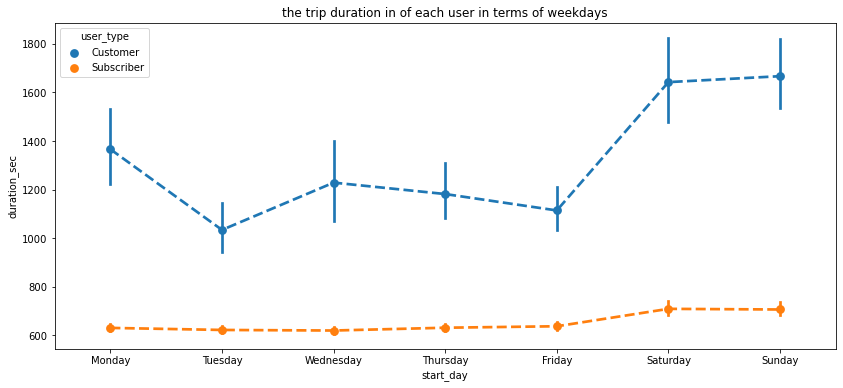

In [12]:
graph_user(df, 'start_day', 'duration_sec', 'user_type', 'line')

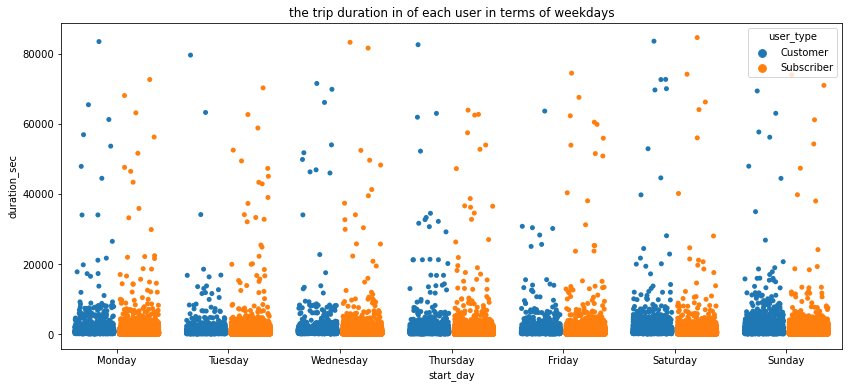

In [13]:
# let's show the actual data to recive in a scatterplot more insights 
graph_user(df, 'start_day', 'duration_sec', 'user_type', 'point')

- customers use bikes for longer periods having the sunday and satuarday the most usage for them which are the weekends 

# weekdays frequency of usage 
what do you think would be the popular day in terms of usage  

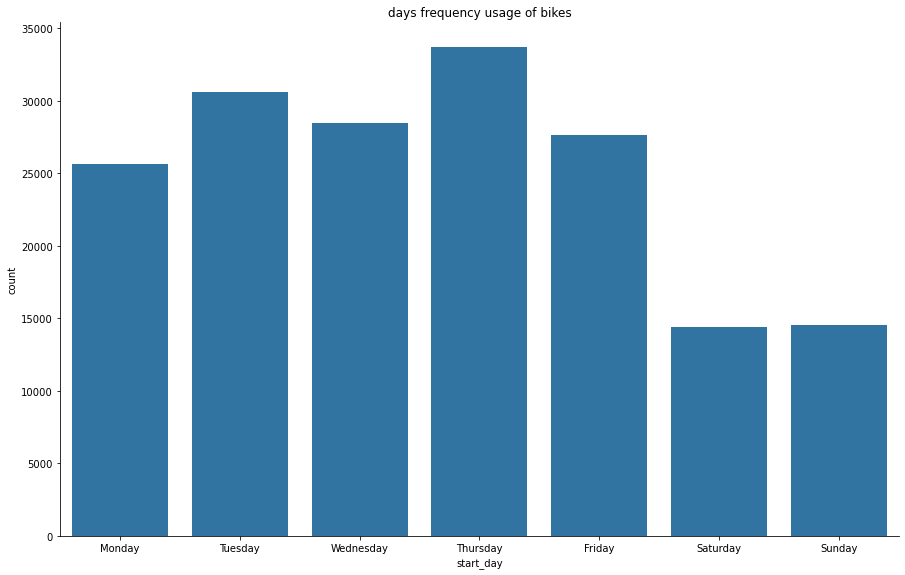

In [14]:
# let's see what is the most frequent day in usage 
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
base_color = sns.color_palette()[0]

freq_days = sns.catplot(data=df, x='start_day',kind='count' ,color=base_color, order=day_order)
plt.title('days frequency usage of bikes')
freq_days.fig.set_size_inches(14,8);

- the thursday is most popular day for usage of the bike system after it comes tuesday.

## conclusions
- bike duartion is between 15 or 10 minutes wich is short amount of time 
-  most of of age of the users is between 20 and 40 
- thursday and tuesday has the most usage of the bikes 
- most frequent usage hours are 8 o'clock in the monrning and 5 afternoon which relates to the regular working hours to most people
- the customers use the bikes for longer periods than subscribers even though the subscribers are much highr in terms of numbers having the sunday and - - satuarday the most usage days which are the weekends
- the thursday is most popular day for usage of the bike system after it comes tuesday.

In [15]:
!jupyter nbconvert explanation_project.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] Converting notebook explanation_project.ipynb to slides
[NbConvertApp] Writing 821042 bytes to explanation_project.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\mylap\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\mylap\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\mylap\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\mylap\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\mylap\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File